# Importing the libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy import stats

import joblib

import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [4]:
 data = pd.read_csv('/home/ali/Desktop/car_price_prediction.csv')

# First look on the data

In [24]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [25]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [26]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 17.4 µs


In [27]:
print(start+'Shape of the Dataframe:'+end,data.shape,'\n')

Shape of the Dataframe: (19237, 18) 



In [28]:
print(start+'Summary Of the dataframe:'+end,'\n')
print(data.info(),'\n')

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color       

# Exploratory Data Analysis and Data Cleaning 

# Variable Transformation

In [5]:
data['Levy'].replace({'-':np.nan}, inplace = True)
data['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

In [6]:
data['Levy'] = data['Levy'].astype('float64')

In [7]:
data['Engine volume'] = data['Engine volume'].str.lower()
data['Turbo'] = data['Engine volume'].str.contains('turbo')
data['Engine volume'] = data['Engine volume'].str.strip('turbo')
data['Engine volume'] = data['Engine volume'].astype('float64')
data['Mileage'] = data['Mileage'].str.strip('km')
data['Mileage'] = data['Mileage'].astype('int64')
data['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

In [8]:
cd = data.drop('ID', axis=1)

# Checking the datatype after transforming and null values in the data

In [33]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  bool   
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  int64  
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [34]:
print(start+'Checking for Null values in the dataframe:'+end,'\n',cd.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo                  0
dtype: int64 



In [35]:
print(start+'Columns in dataframe:'+end,cd.columns)

Columns in dataframe: Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')


# Looking into the values in each column

In [36]:
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')

In [37]:
values_in_columns(cd)

Column Name--->Price
Number of Unique Values 2315 

Count of each unique value 
 15681    280
470      274
14113    244
392      242
314      235
        ... 
42601      1
149        1
54349      1
54954      1
22075      1
Name: Price, Length: 2315, dtype: int64 

Column Name--->Levy
Number of Unique Values 558 

Count of each unique value 
 765.0     486
891.0     461
639.0     410
640.0     405
1017.0    298
         ... 
3156.0      1
2908.0      1
1279.0      1
1719.0      1
1901.0      1
Name: Levy, Length: 558, dtype: int64 

Column Name--->Manufacturer
Number of Unique Values 65 

Count of each unique value 
 HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64 

Column Name--->Model
Number of Unique Values 1590 

Count of each unique value 
 Prius

# Analyzing the data

In [38]:
cd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,19237.0,1.855593e+04,1.905813e+05,1.0,5331.0,13172.0,22075.0,2.630750e+07
Levy,13418.0,9.068381e+02,4.618671e+02,87.0,640.0,781.0,1058.0,1.171400e+04
Prod. year,19237.0,2.010913e+03,5.668673e+00,1939.0,2009.0,2012.0,2015.0,2.020000e+03
Engine volume,19237.0,2.307990e+00,8.778045e-01,0.0,1.8,2.0,2.5,2.000000e+01
Mileage,19237.0,1.532236e+06,4.840387e+07,0.0,70139.0,126000.0,188888.0,2.147484e+09
Cylinders,19237.0,4.582991e+00,1.199933e+00,1.0,4.0,4.0,4.0,1.600000e+01
Doors,19237.0,3.925872e+00,4.033993e-01,2.0,4.0,4.0,4.0,5.000000e+00
Airbags,19237.0,6.582627e+00,4.320168e+00,0.0,4.0,6.0,12.0,1.600000e+01


<ol>
    <li><b>Price:</b> As Mean > Median, it's <b>rightly skewed<b></li>
    <li><b>Levy:</b> in range between 87 and 11.7K and As Mean > Median, <b>it's rightly skewed<b></li>
    <li><b>Prod.year:</b> The cars are made between 1939 and 2020. As Mean slightly < Median, it's <b>slightly leftly skewed</b>.</li>
    <li><b>Engine volume:</b> the volumes are in range 0 - 20. As Mean slightly > Median, it's <b>slightly rightly skewed.</b></li>
    <li><b>Mileage:</b> Mileage in range 0 - 2.147G . As Mean > Median, it's <b>Hightly rightly skewed</b>.</li>
    <li><b>Cylinders:</b> Engines have cylindars between 1 - 16. As Mean slightly > Median, it's <b>slightly rightly skewed</b>.</li>
    <li><b>Doors:</b> cars have doors between 2 - 5. As Mean slightly < Median, it's <b>slightly rightly skewed</b>.</li> as median almost equals the mean in this situation we can say that number of Doors are equally spaced and Normal Distributed
    <li><b>Airbags:</b> Number of Airbags range from 0 - 16 As Mean > Median, it's <b>rightly skewed</b>.</li>

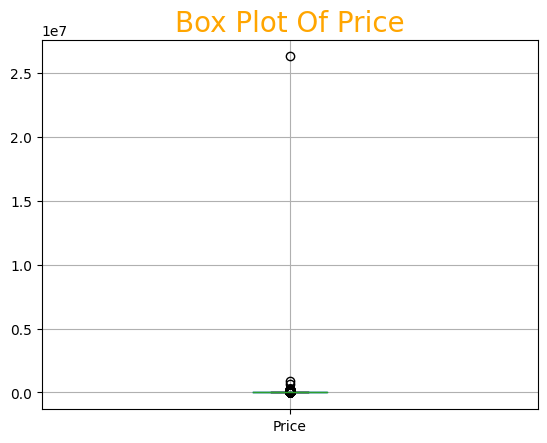

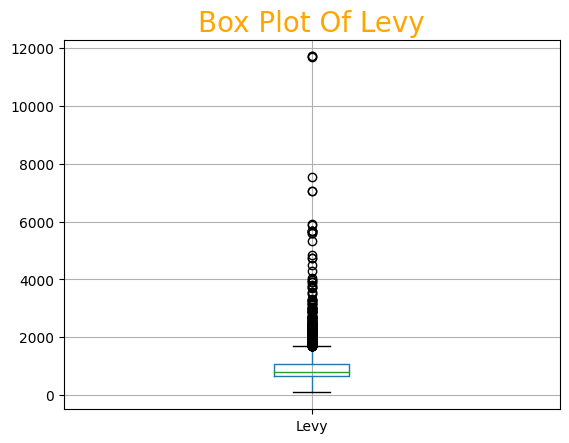

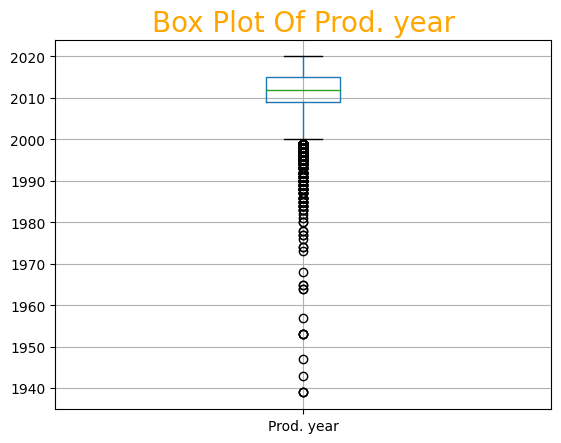

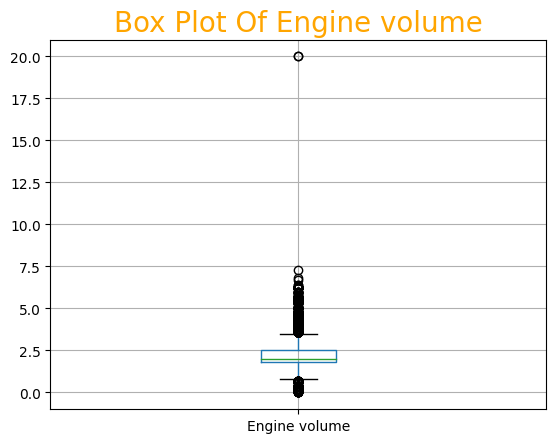

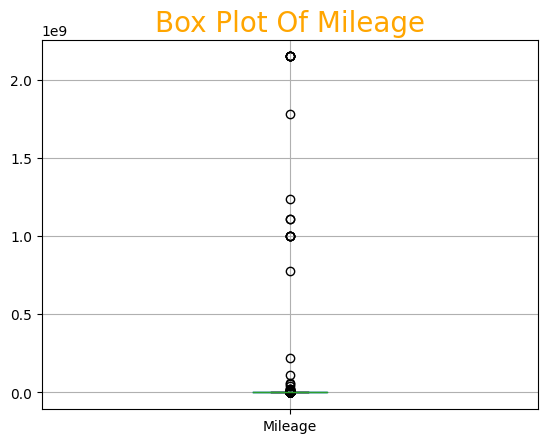

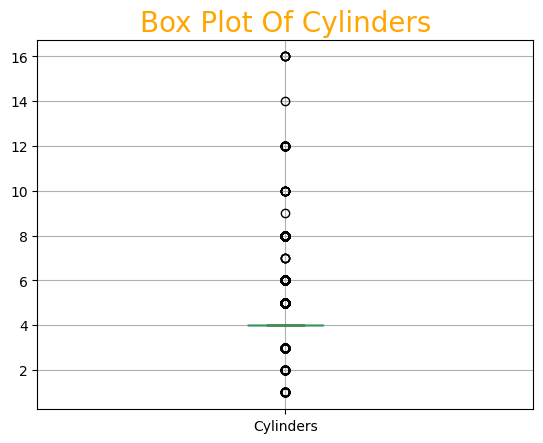

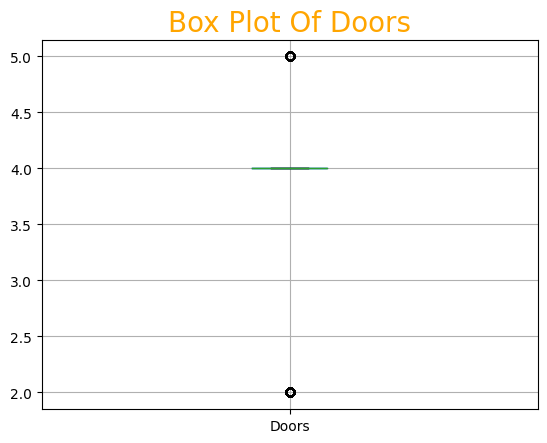

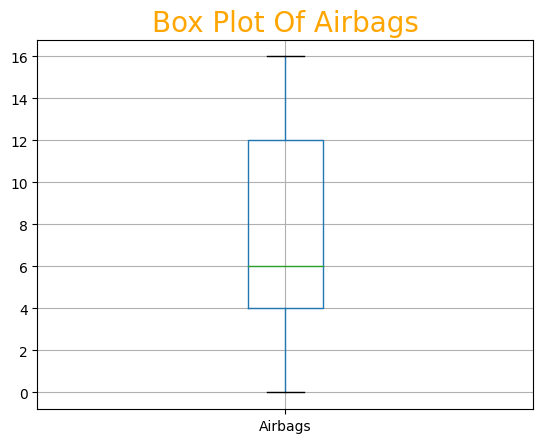

In [39]:
for i in cd.columns:
    if cd[i].dtypes =='int64'or cd[i].dtypes=='float':
        cd.boxplot(column=i)
        plt.title(f"Box Plot Of {i}" , fontsize=20,
              color="orange")
        plt.show()

There are lots of feature which are having outliers

Text(0.5, 1.0, 'Analysis of Manufacturer')

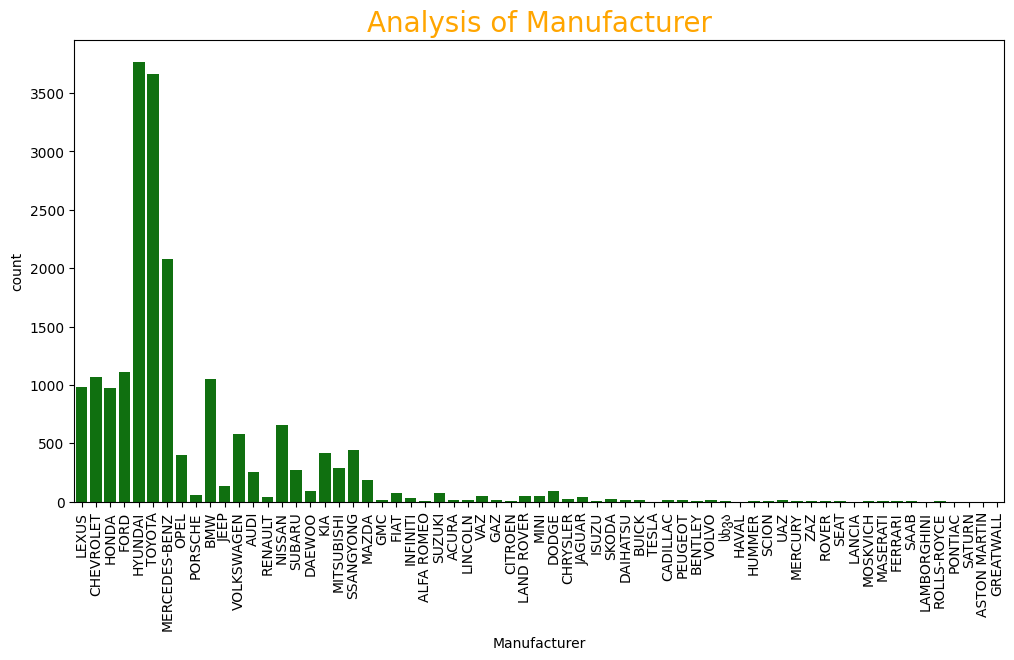

In [40]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Manufacturer'],color='green')
plt.title(f"Analysis of Manufacturer" , fontsize=20,
          color="orange")

We can notice that most of the cars from specific Manufacturers

Text(0.5, 1.0, 'Analysis of Prod. year')

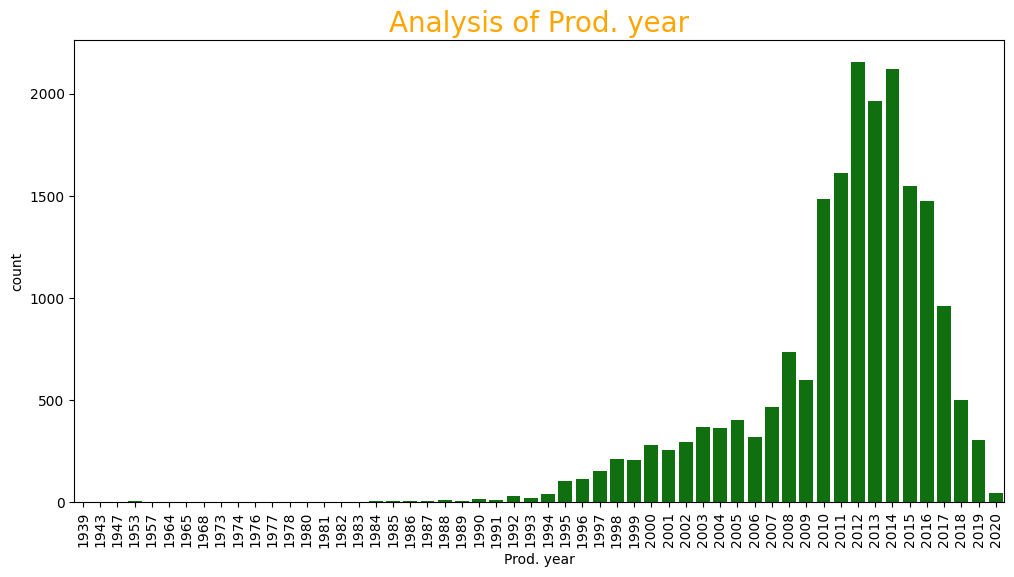

In [41]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Prod. year'],color='green')
plt.title(f"Analysis of Prod. year" , fontsize=20,
          color="orange")

almost all of the cars are made after 1995 and huge part of them are modern cars

Text(0.5, 1.0, 'Analysis of Airbags')

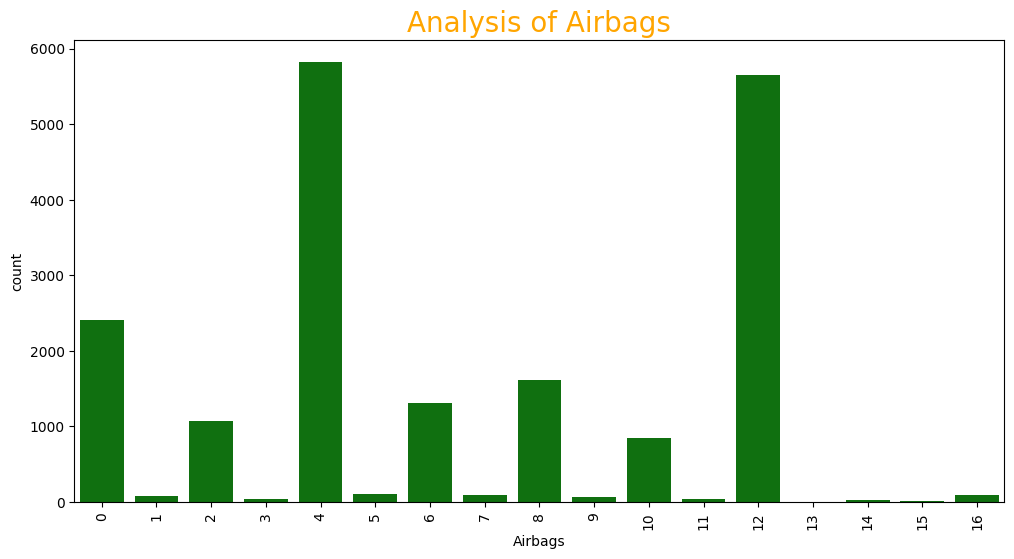

In [42]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Airbags'],color='green')
plt.title(f"Analysis of Airbags" , fontsize=20,
          color="orange")

Text(0.5, 1.0, 'Analysis of Leather interior')

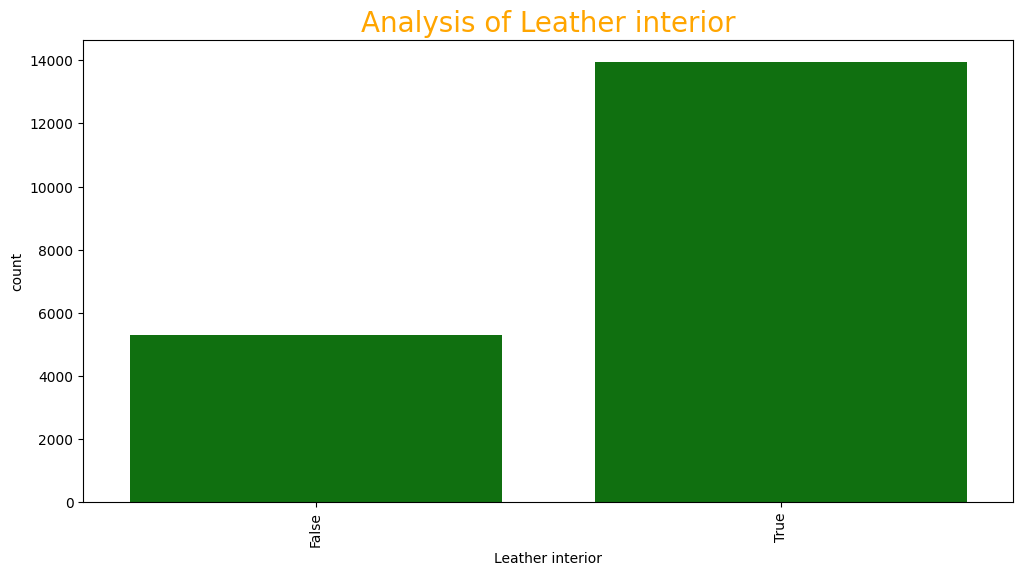

In [43]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Leather interior'],color='green')
plt.title(f"Analysis of Leather interior" , fontsize=20,
          color="orange")

The bigger part of the cars has leather interior

Text(0.5, 1.0, 'Analysis of Category ')

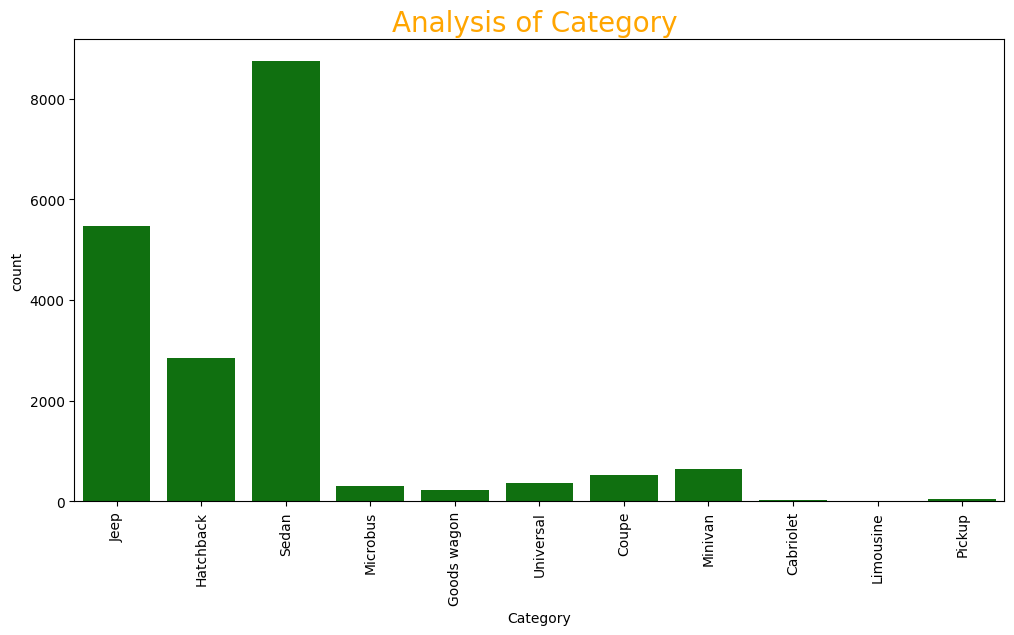

In [44]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Category'],color='green')
plt.title(f"Analysis of Category " , fontsize=20,
          color="orange")

Text(0.5, 1.0, 'Analysis of Drive wheels')

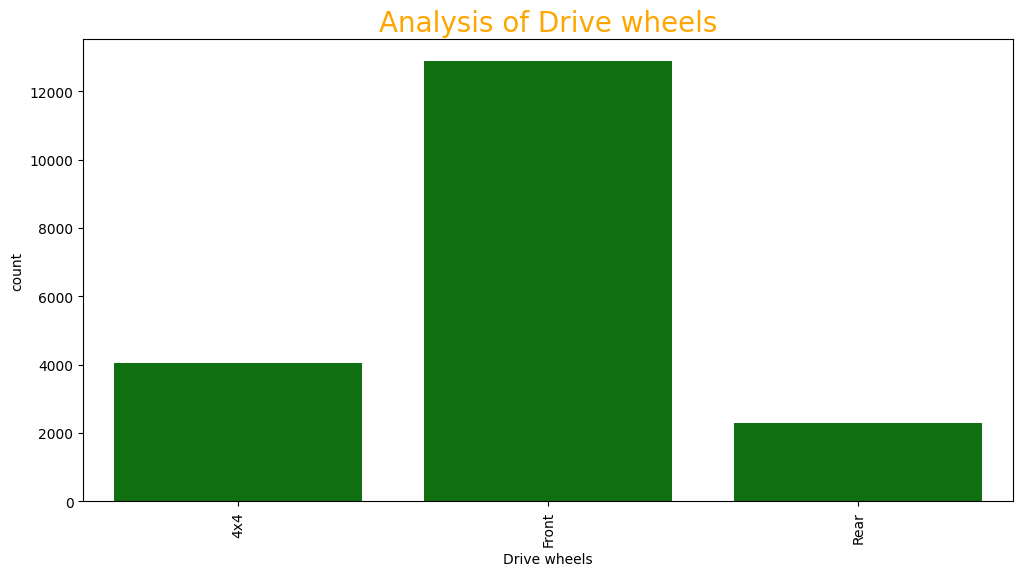

In [45]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Drive wheels'],color='green')
plt.title(f"Analysis of Drive wheels" , fontsize=20,
          color="orange")

The bigger part of the cars has front drive wheels

Text(0.5, 1.0, 'Analysis of Fuel type ')

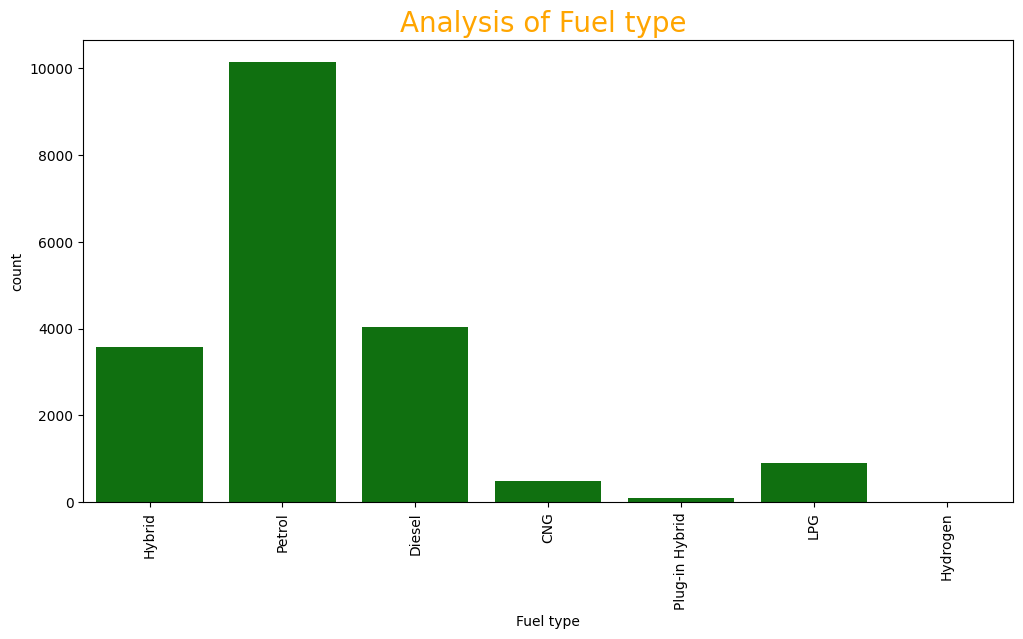

In [46]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Fuel type'],color='green')
plt.title(f"Analysis of Fuel type " , fontsize=20,
          color="orange")

Petrol and diesel is the common fuel type with some cars are hybrid

Text(0.5, 1.0, 'Analysis of Engine volume ')

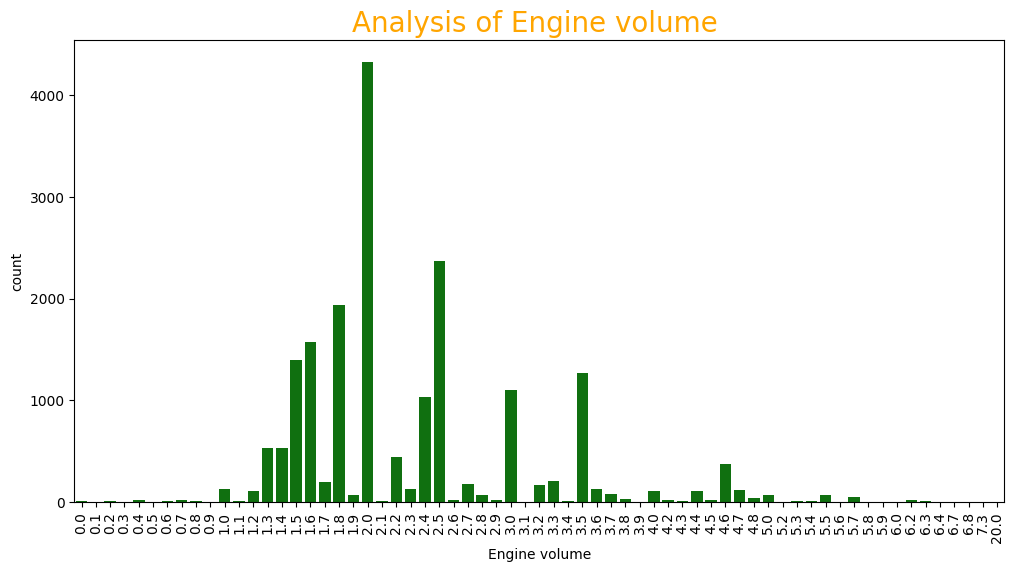

In [47]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Engine volume'],color='green')
plt.title(f"Analysis of Engine volume " , fontsize=20,
          color="orange")

Text(0.5, 1.0, 'Analysis of Cylinders ')

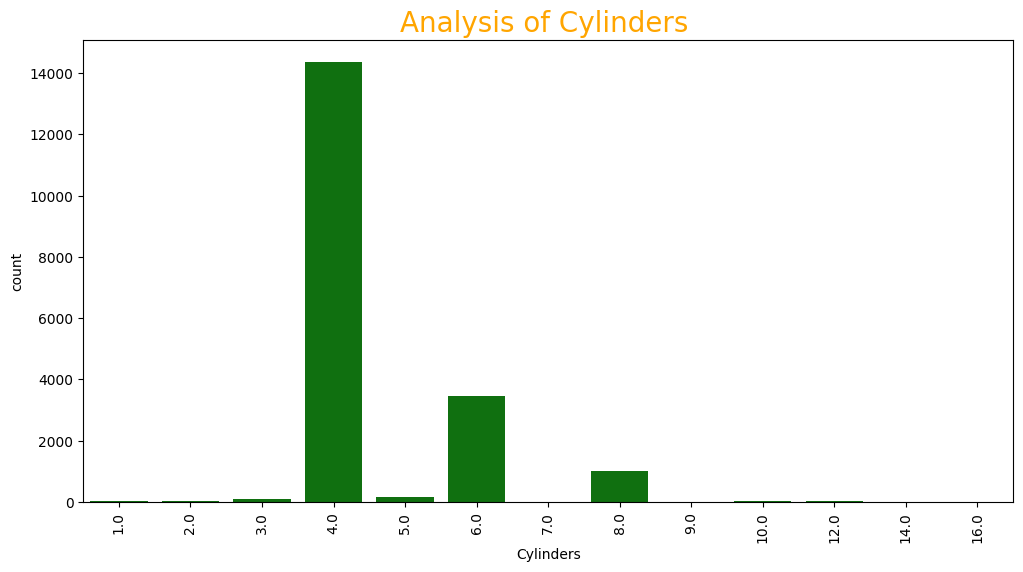

In [9]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Cylinders'],color='green')
plt.title(f"Analysis of Cylinders " , fontsize=20,
          color="orange")

most engines have 4 cylindars

Text(0.5, 1.0, 'Analysis of Gear box type ')

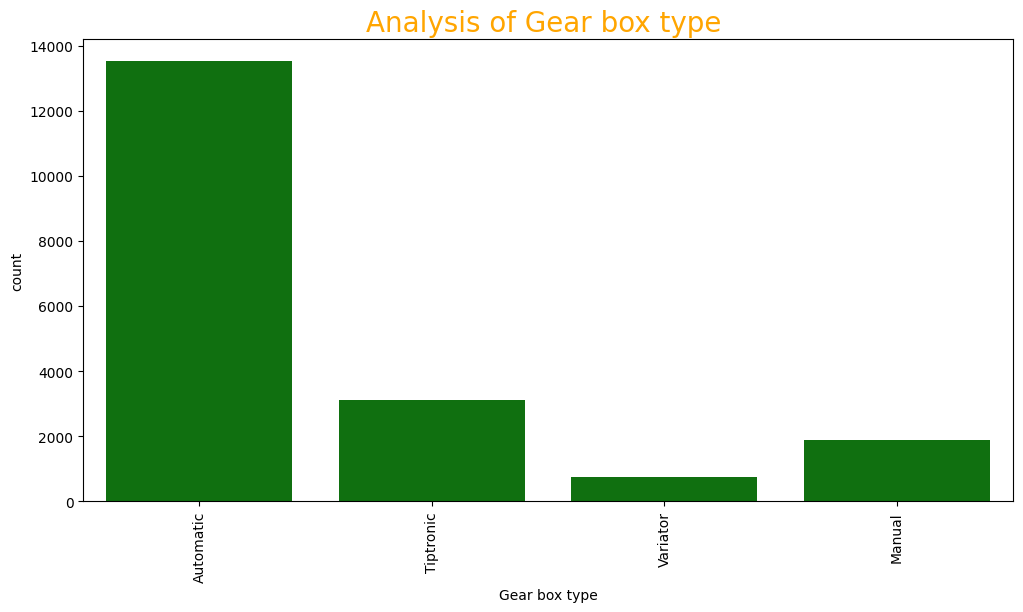

In [49]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Gear box type'],color='green')
plt.title(f"Analysis of Gear box type " , fontsize=20,
          color="orange")

Automatic gear box is the common one

Text(0.5, 1.0, 'Analysis of Doors ')

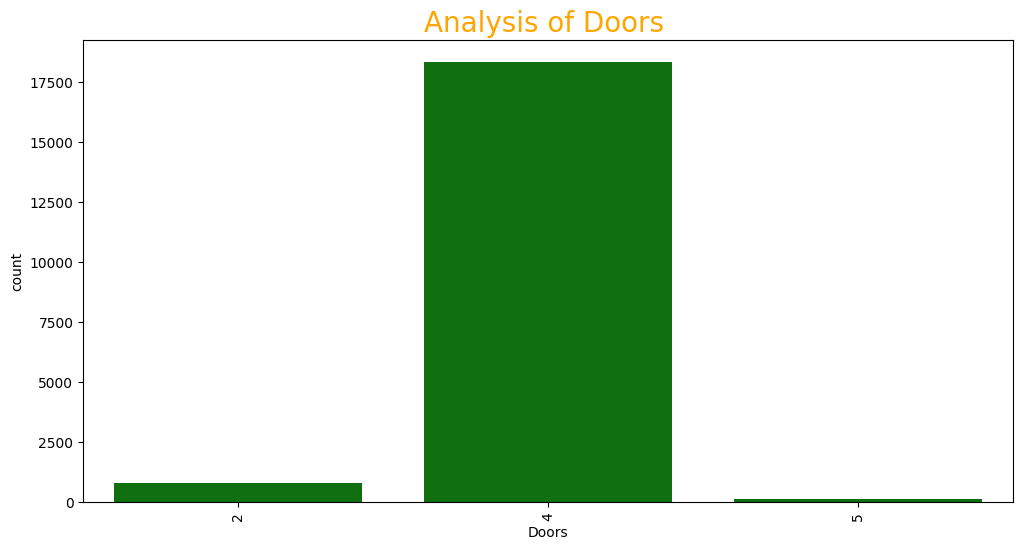

In [50]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Doors'],color='green')
plt.title(f"Analysis of Doors " , fontsize=20,
          color="orange")

cars with 4 doors are the most common cars

Text(0.5, 1.0, 'Analysis of Turbo ')

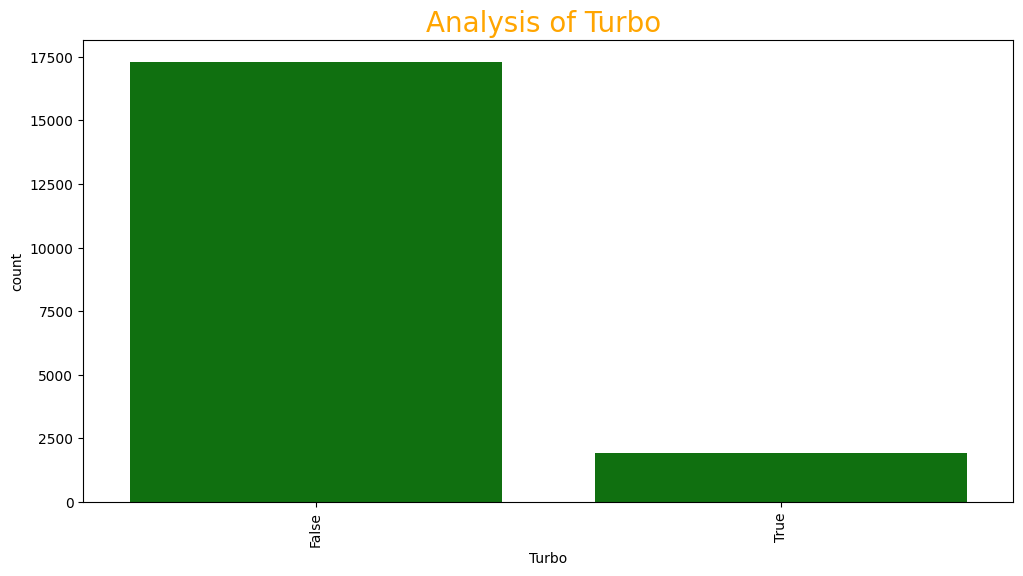

In [51]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Turbo'],color='green')
plt.title(f"Analysis of Turbo " , fontsize=20,
          color="orange")

the bigger part of cars does not have Turbo

Text(0.5, 1.0, 'Analysis of Wheel ')

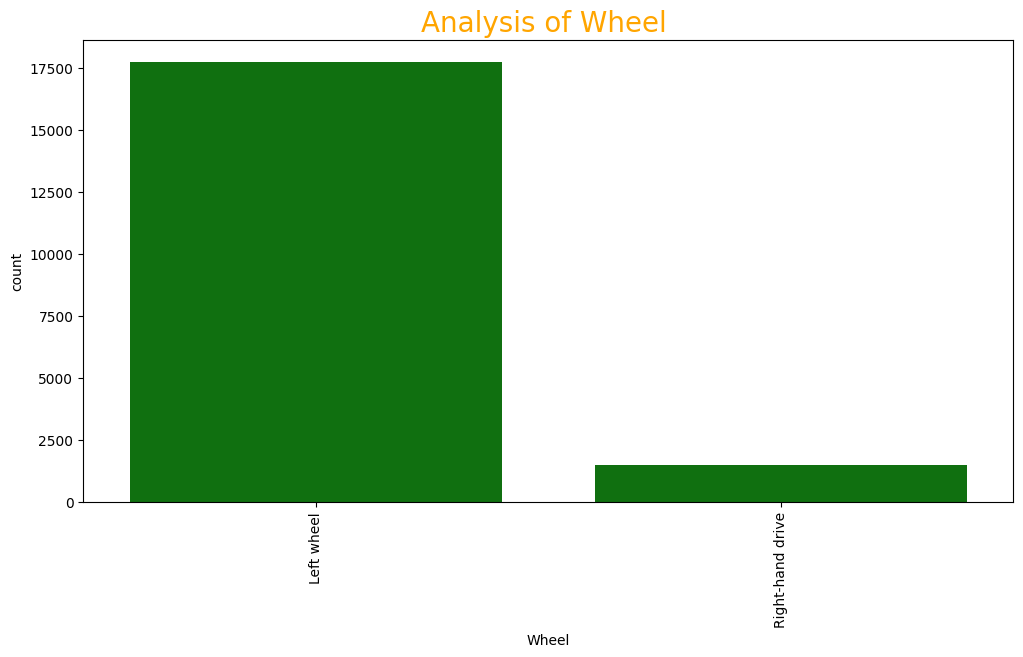

In [52]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Wheel'],color='green')
plt.title(f"Analysis of Wheel " , fontsize=20,
          color="orange")

most cars have the drive wheel on the left side of the car

Text(0.5, 1.0, 'Analysis of Color ')

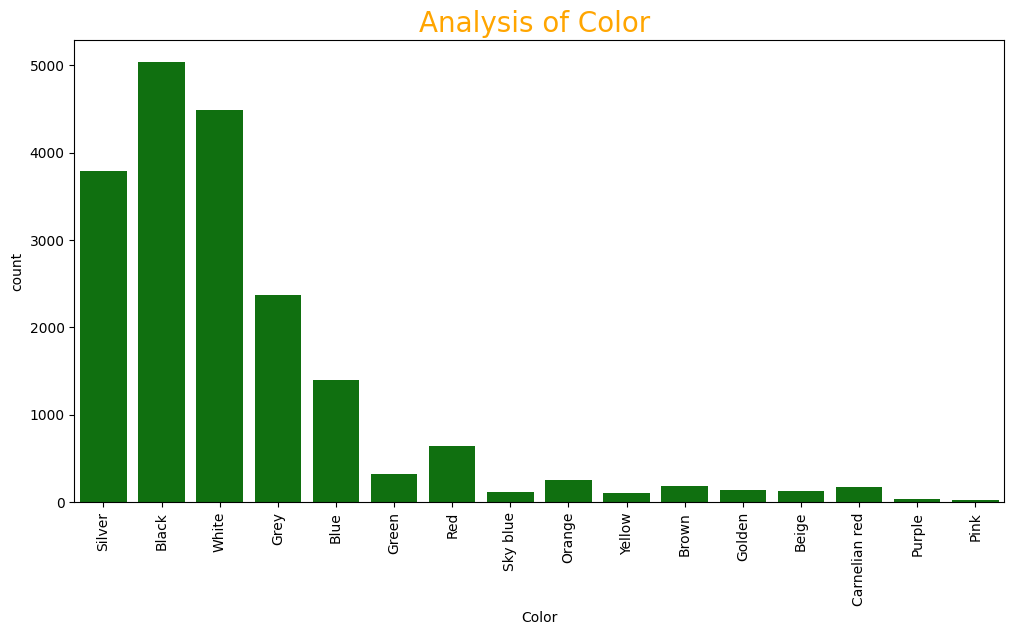

In [53]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 90)
sns.countplot(x=cd['Color'],color='green')
plt.title(f"Analysis of Color " , fontsize=20,
          color="orange")

Skewness is : 5.449954090897364
Skewness is : -2.08226076592925
Skewness is : -1.0099814274400567
Skewness is : 2.1862419140120277
Skewness is : 2.091083485629857
Skewness is : -4.26415516157442
Skewness is : 0.08201181063247329
Skewness is : 2.6598644433344747


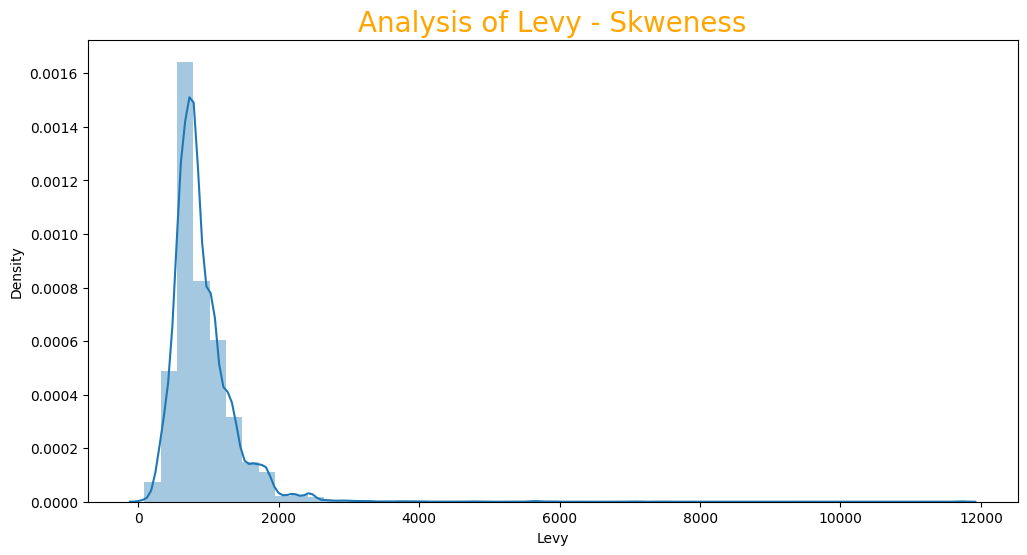

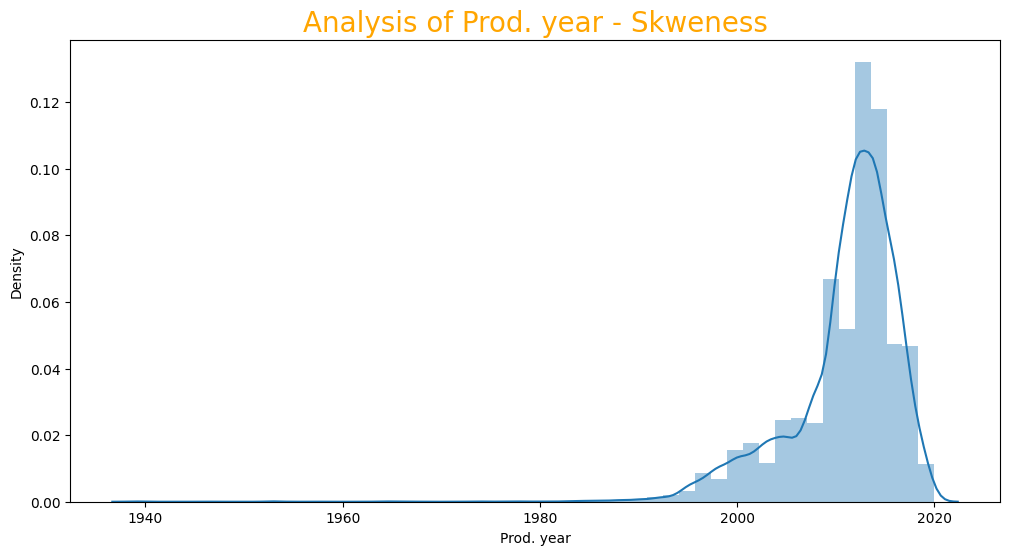

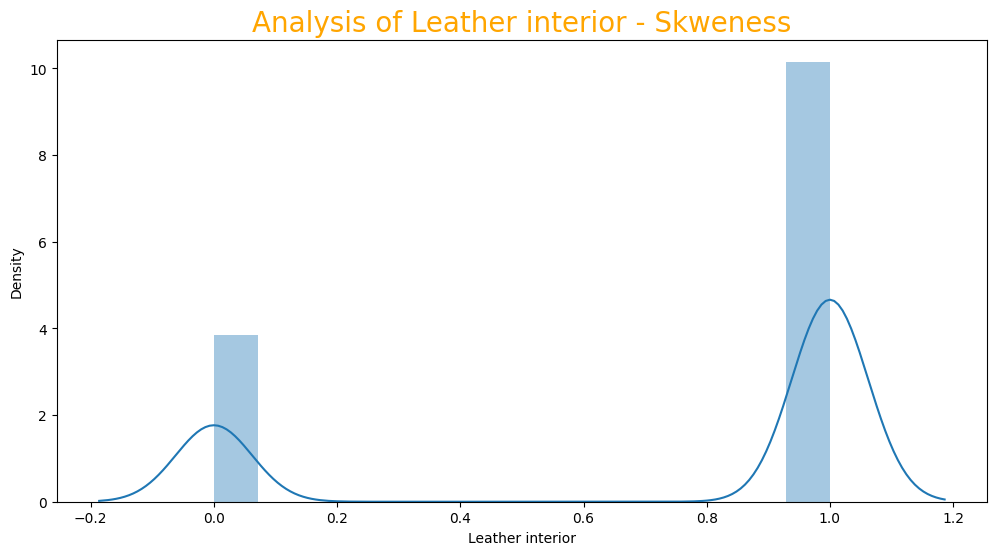

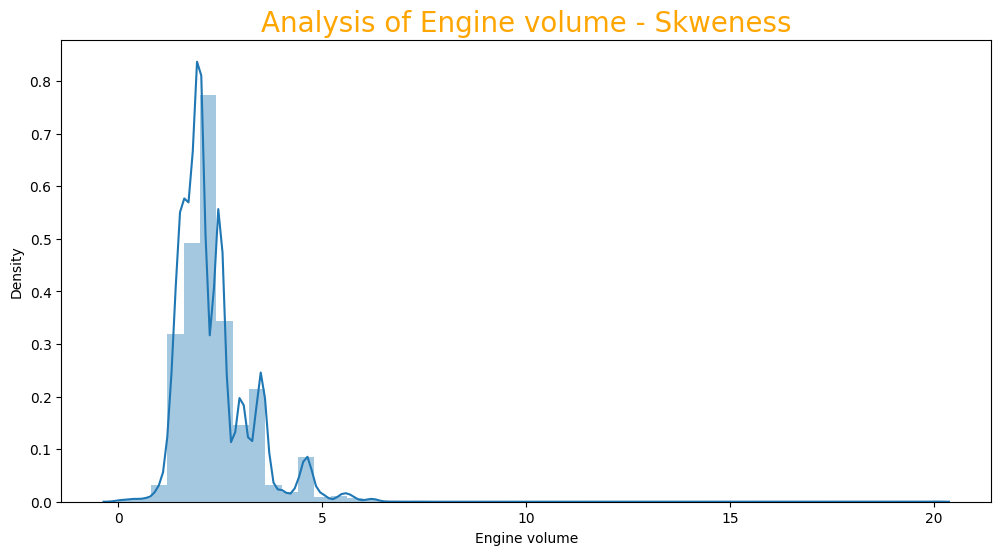

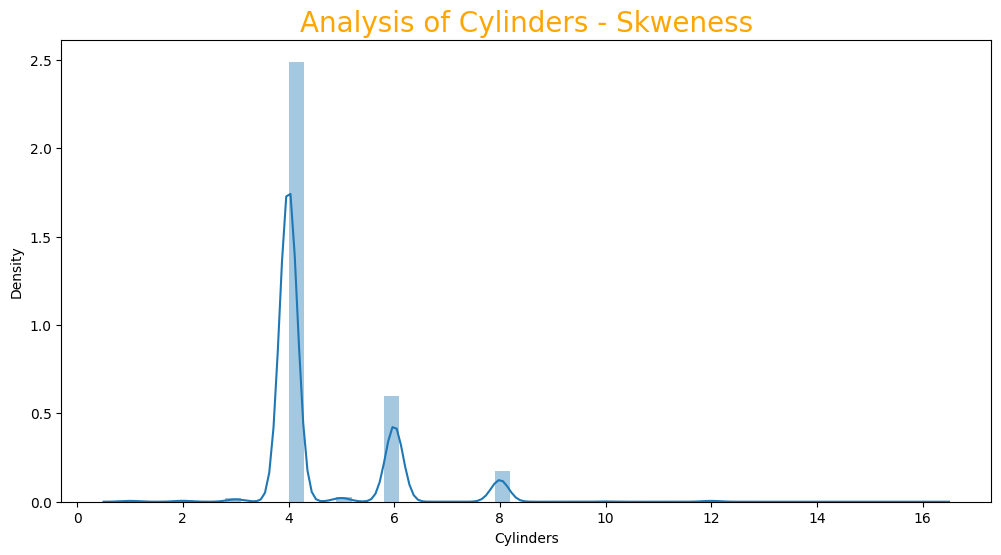

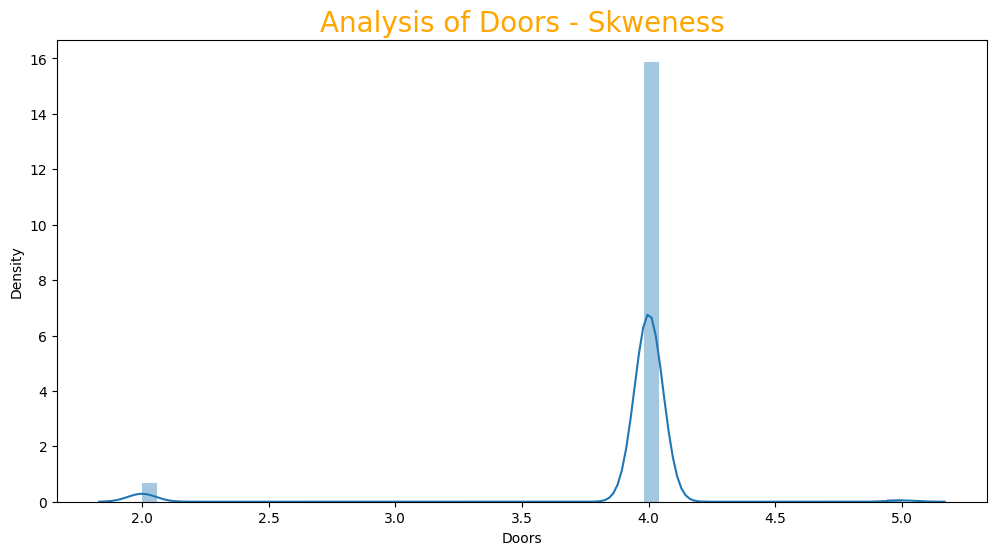

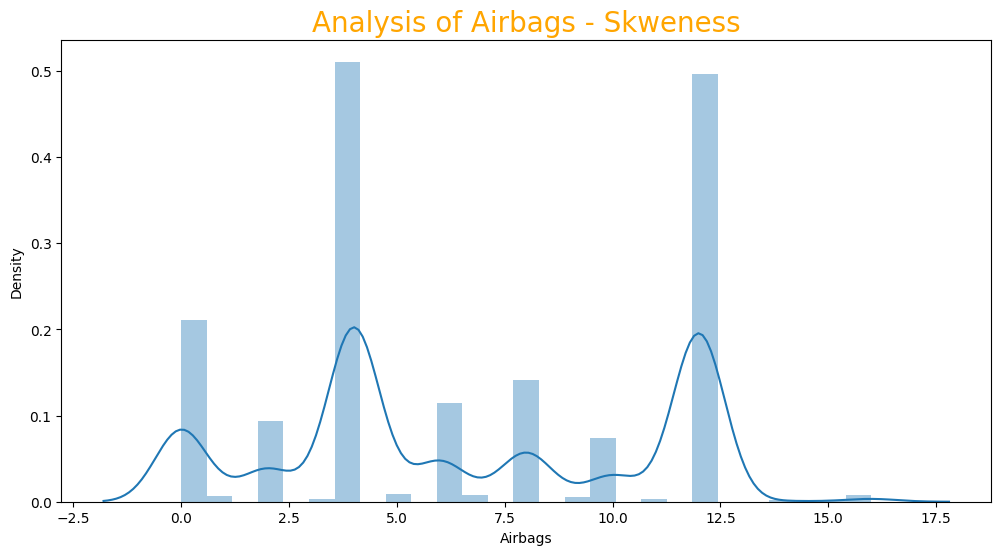

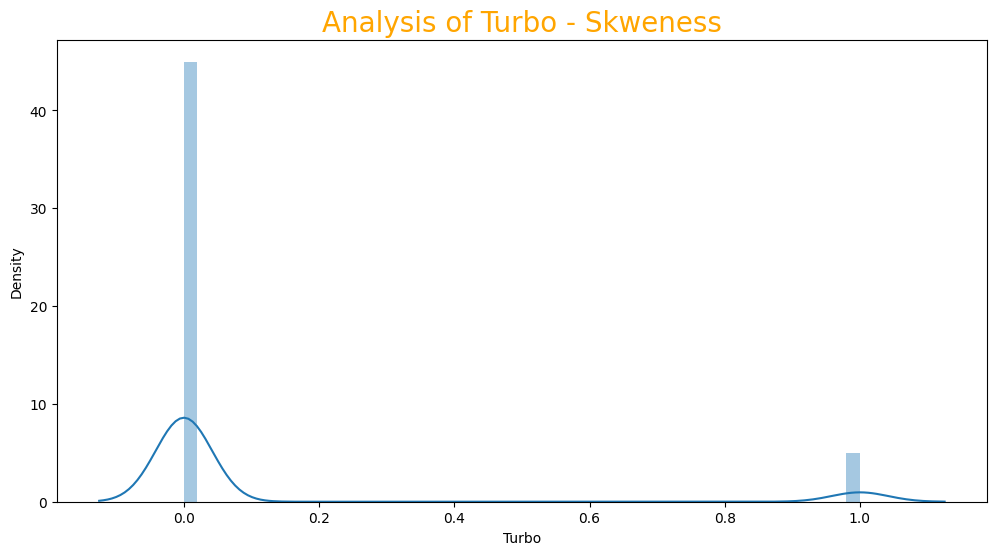

In [55]:
for i in cd.columns:
    if cd[i].dtypes!='object' and i!='Price' and i!='Mileage':
        plt.figure(figsize=(12,6))
        print("Skewness is :",cd[i].skew())
        sns.distplot(cd[i])
        plt.title(f"Analysis of {i} - Skweness" , fontsize=20,
          color="orange")

Text(0.5, 1.0, 'Pairplot')

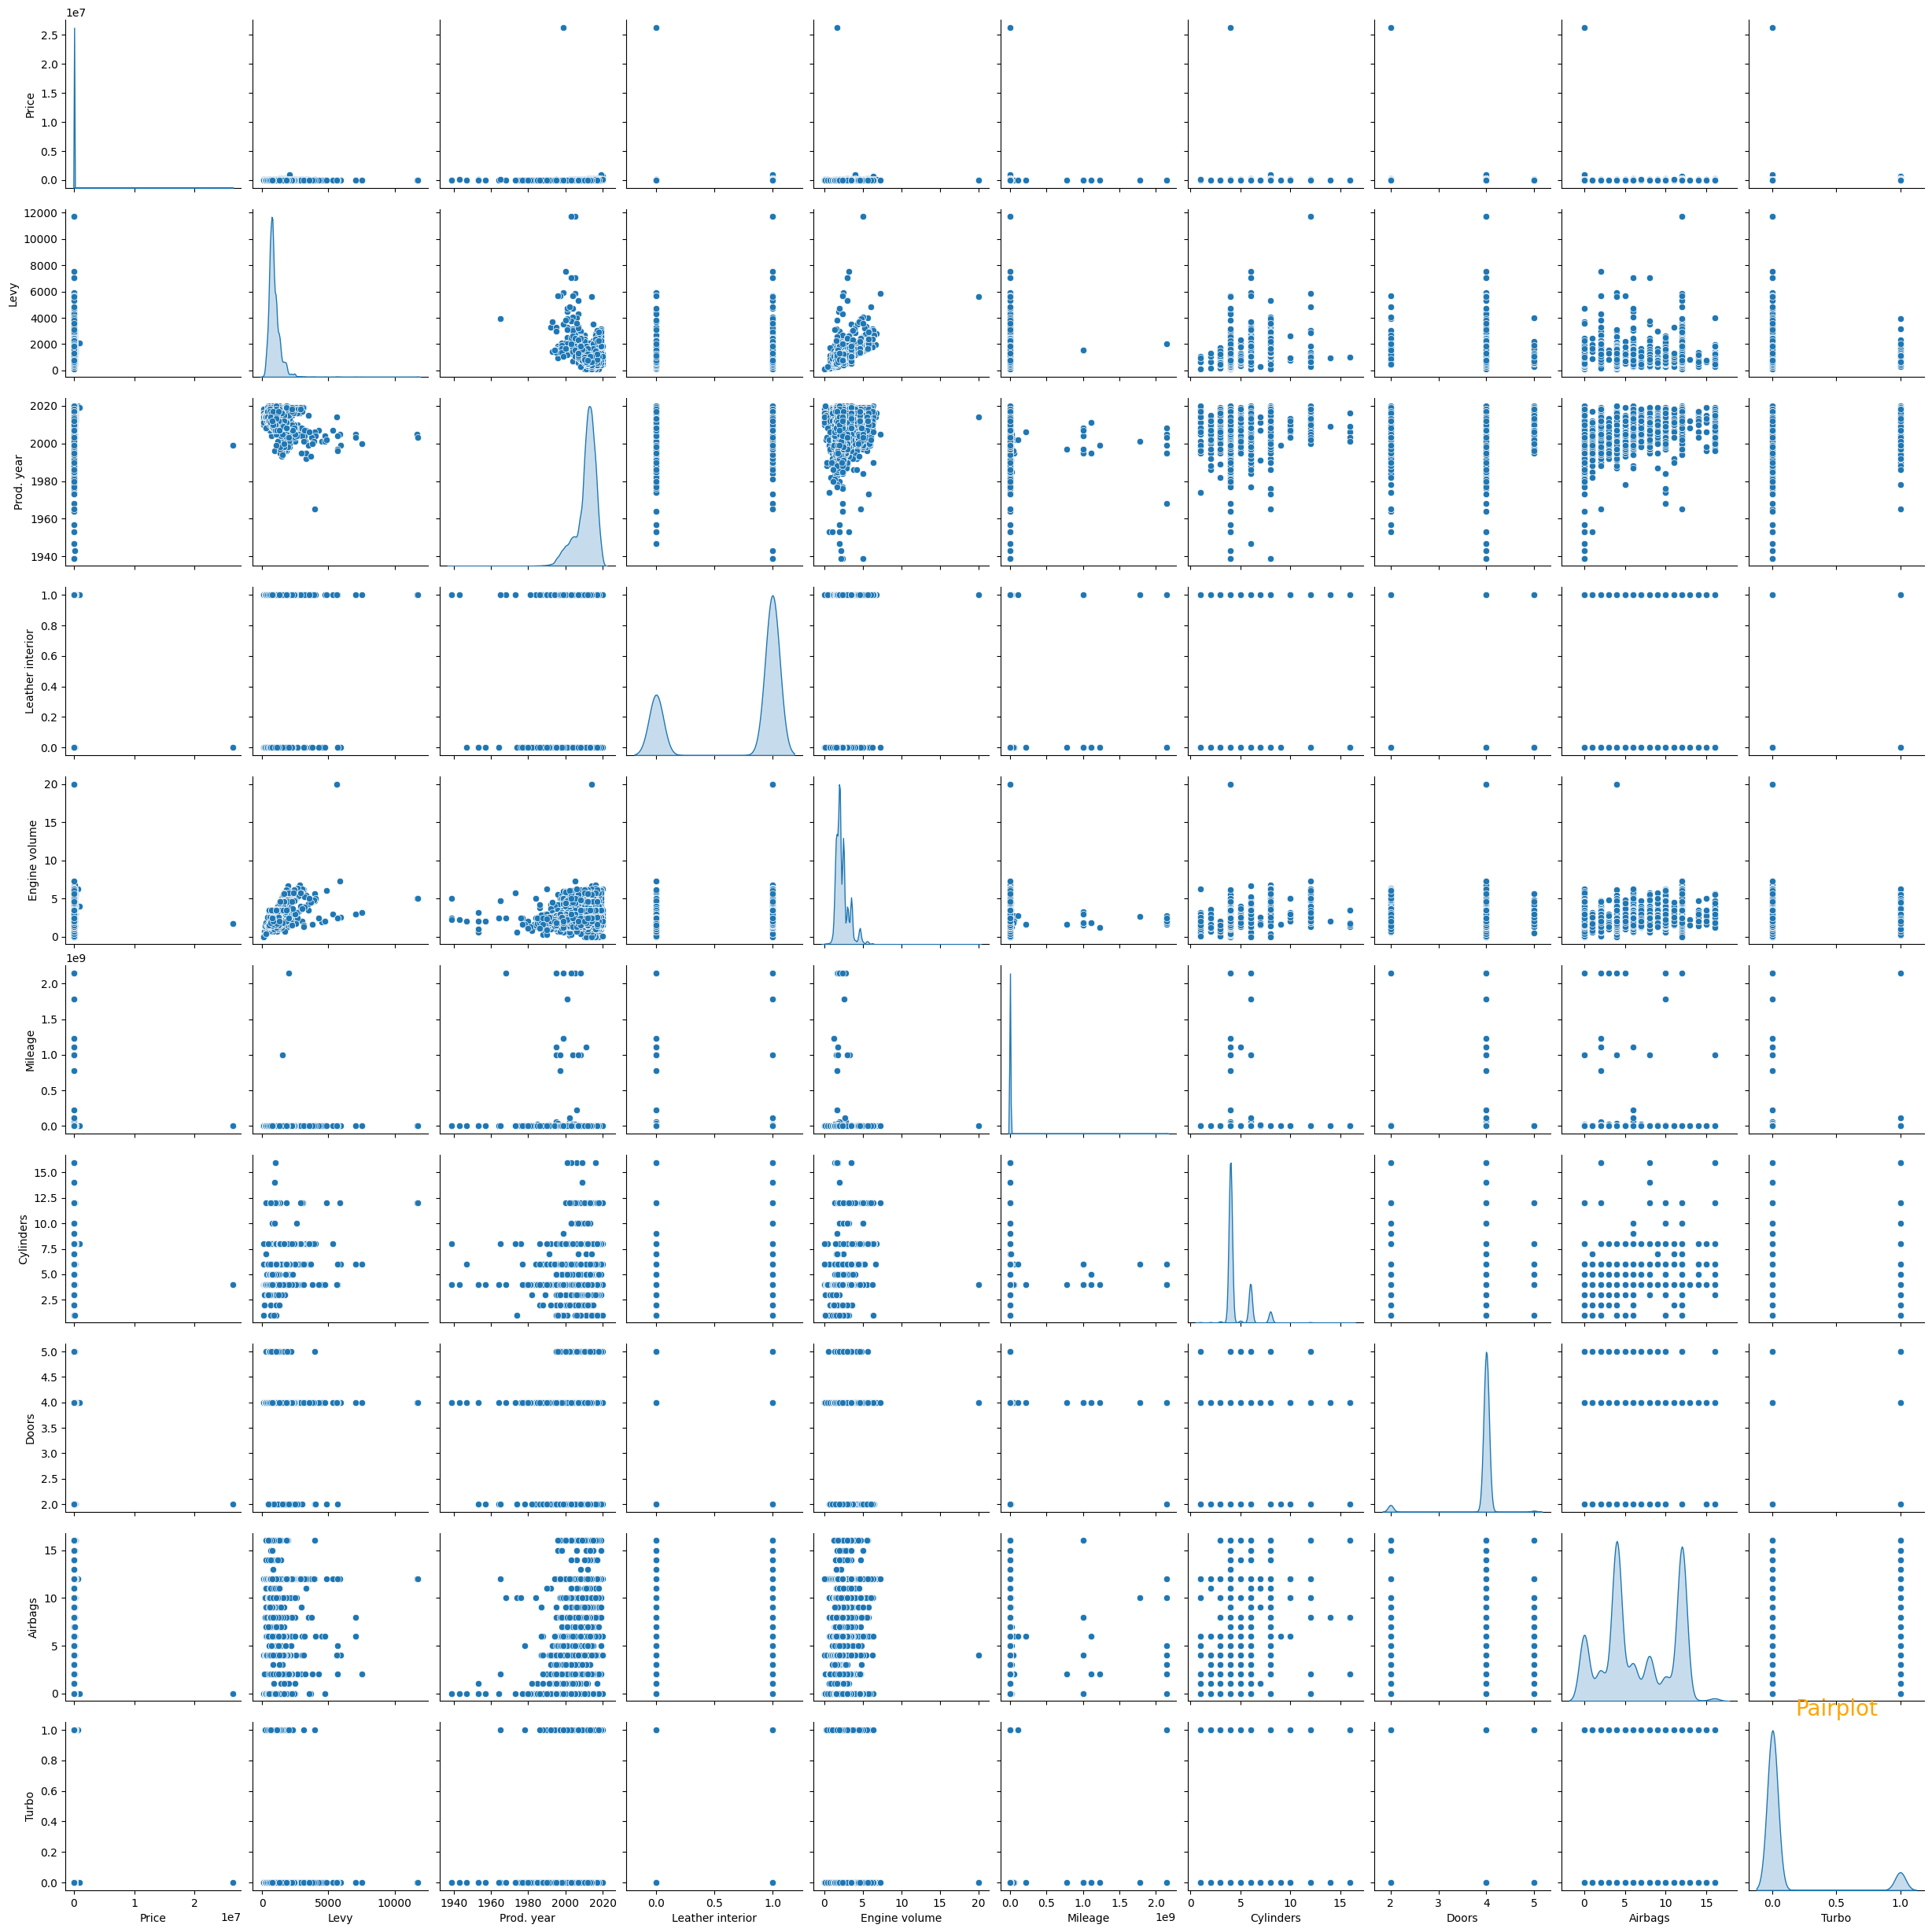

In [56]:
sns.pairplot(cd, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20,
          color="orange")

In [57]:
corr = cd.corr(method ='pearson')
corr

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Turbo
Price,1.000000,0.063291,0.012982,0.000754,0.008753,-0.001758,0.007518,-0.033116,-0.012824,0.017379
Levy,0.063291,1.000000,-0.237967,0.017880,0.648215,0.023624,0.588695,-0.077520,0.081107,-0.022606
Prod. year,0.012982,-0.237967,1.000000,0.390066,-0.030906,-0.063501,-0.096797,0.195616,0.236969,-0.076129
Leather interior,0.000754,0.017880,0.390066,1.000000,0.274647,-0.034379,0.202473,0.106362,0.165023,-0.104140
Engine volume,0.008753,0.648215,-0.030906,0.274647,1.000000,-0.006289,0.778524,-0.016913,0.224441,-0.017052
Mileage,-0.001758,0.023624,-0.063501,-0.034379,-0.006289,1.000000,-0.001768,-0.006281,-0.009201,-0.001511
Cylinders,0.007518,0.588695,-0.096797,0.202473,0.778524,-0.001768,1.000000,-0.035297,0.176868,0.036798
Doors,-0.033116,-0.077520,0.195616,0.106362,-0.016913,-0.006281,-0.035297,1.000000,0.048319,-0.089994
Airbags,-0.012824,0.081107,0.236969,0.165023,0.224441,-0.009201,0.176868,0.048319,1.000000,0.061623
Turbo,0.017379,-0.022606,-0.076129,-0.104140,-0.017052,-0.001511,0.036798,-0.089994,0.061623,1.000000


we can notice the linear relationship between all the features 

Text(0.5, 1.0, 'Heatmap')

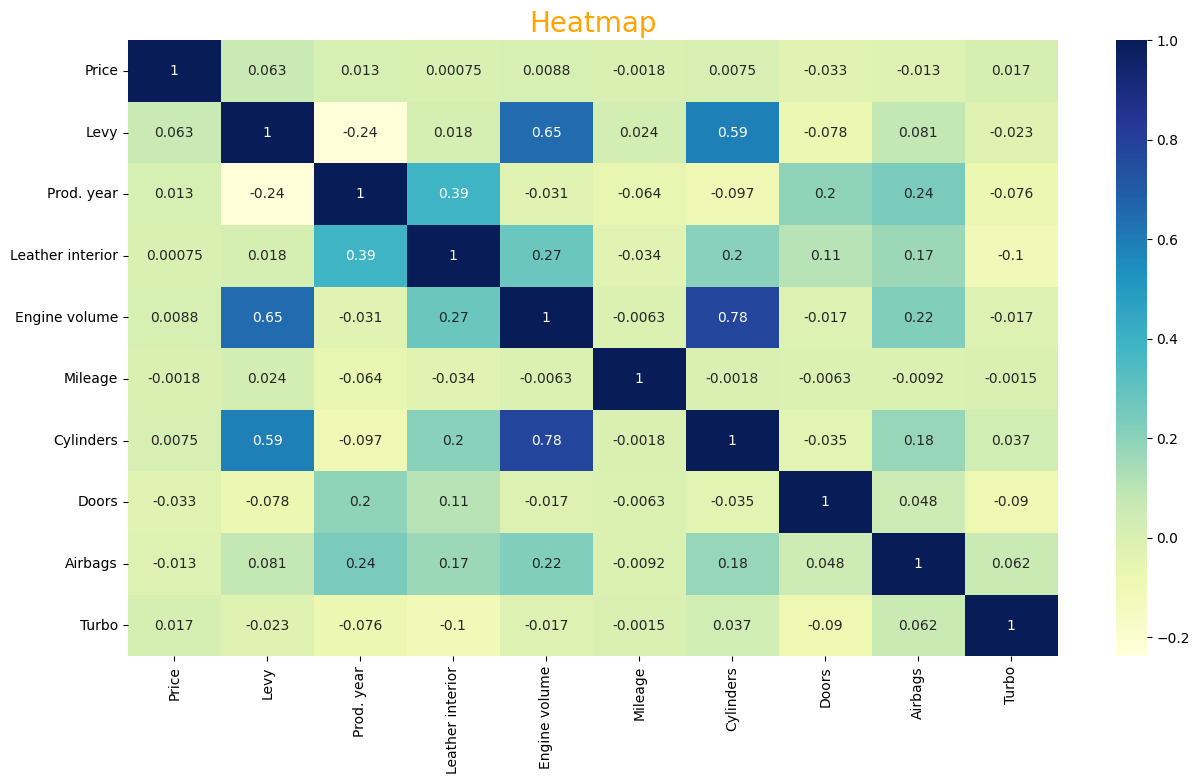

In [58]:
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title(f"Heatmap" , fontsize=20,
          color="orange")

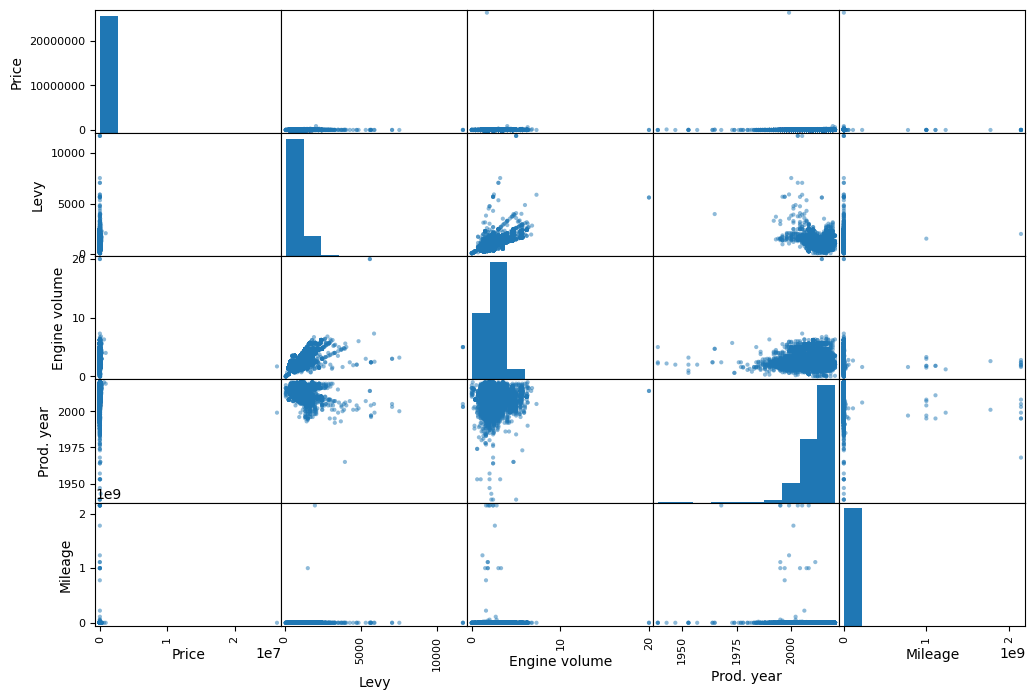

In [59]:
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(cd[attributes], figsize=(12,8))
plt.show()

# Data Processing

In [61]:
display(cd[cd.Price == cd.Price.max()])
display(cd[cd.Price < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,True,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,True,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,549,1079.0,TOYOTA,CHR,2018,Jeep,True,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,True,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,941,1850.0,LEXUS,RX 400,2008,Jeep,True,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,True,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,50,NaN,TOYOTA,Prius,2008,Hatchback,False,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [62]:
display(cd[cd.Mileage == cd.Mileage.max()])
display(cd[cd.Mileage < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2278,6899,NaN,VOLKSWAGEN,Golf,1999,Sedan,False,Petrol,1.6,2147483647,4.0,Manual,Front,4,Left wheel,Black,4,False
6157,5959,NaN,MERCEDES-BENZ,C 180,1995,Sedan,False,CNG,1.8,2147483647,4.0,Manual,Rear,4,Left wheel,Blue,5,False
11901,10036,NaN,SUBARU,Forester,2005,Jeep,False,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12734,2200,NaN,UAZ,31514,1968,Jeep,True,CNG,2.4,2147483647,4.0,Manual,4x4,4,Left wheel,Black,10,False
15347,3,NaN,BMW,525,1995,Sedan,False,Petrol,2.8,2147483647,6.0,Manual,Rear,4,Left wheel,Black,3,False
15393,15681,NaN,TOYOTA,Prius,2008,Sedan,False,Petrol,2.0,2147483647,4.0,Automatic,Front,4,Left wheel,Blue,0,False
19167,18817,1995.0,FORD,Transit,2003,Microbus,False,Diesel,2.4,2147483647,4.0,Manual,Front,2,Left wheel,White,2,True


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
11,8781,NaN,FORD,Transit,1999,Microbus,False,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,4704,NaN,OPEL,Vectra,1995,Sedan,False,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,8154,NaN,HONDA,Cr-v,1998,Jeep,False,Petrol,2.0,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,4234,NaN,HONDA,Civic,1997,Hatchback,True,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,NaN,BMW,320,1994,Sedan,True,Petrol,2.0,0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,2200,NaN,PEUGEOT,406,2001,Sedan,False,Petrol,2.0,0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,30,NaN,NISSAN,Tiida,2006,Hatchback,False,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


In [63]:
def detect_outliers(df,features,thold):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [65]:
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(cd,features, 1.5)
deleted_df = cd.drop(cd.loc[outliers].index,axis=0)

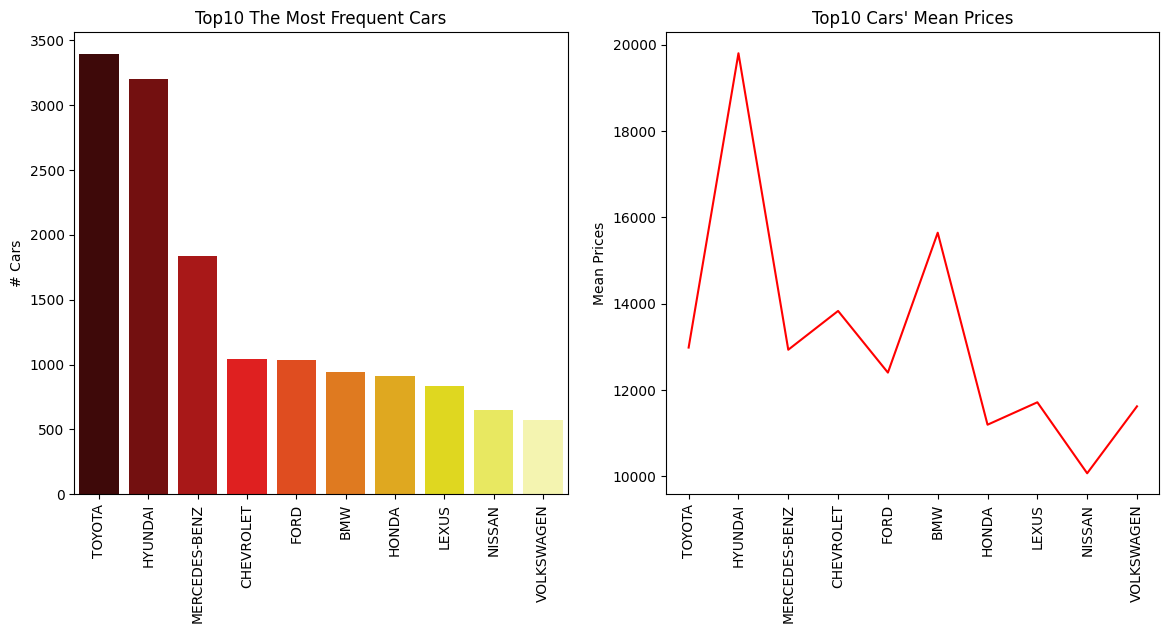

In [68]:
top10_cars = deleted_df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]
top10_mean_prices = [deleted_df[deleted_df['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(x=top10_cars.index, y=top10_cars.values, palette='hot')
plt.xticks(rotation = 90)
plt.ylabel('# Cars')
plt.title('Top10 The Most Frequent Cars')

ax2 = fig.add_subplot(122)
sns.lineplot(x=top10_cars.index, y=top10_mean_prices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()

In [69]:
deleted_df.groupby('Doors')['Drive wheels'].value_counts()

Doors  Drive wheels
2      Rear              335
       Front             285
       4x4               103
4      Front           11528
       4x4              3440
       Rear             1723
5      Front              54
       Rear               30
       4x4                29
Name: Drive wheels, dtype: int64

In [70]:
dd_val = np.array(deleted_df.groupby('Doors')['Drive wheels'].value_counts().values).reshape(3,3)
dd_sum = dd_val.sum(axis=1).reshape(3,1)
dd_sum = np.c_[dd_sum, dd_sum, dd_sum].flatten()

(deleted_df.groupby('Doors')['Drive wheels'].value_counts() / dd_sum)*100

Doors  Drive wheels
2      Rear            46.334716
       Front           39.419087
       4x4             14.246196
4      Front           69.067162
       4x4             20.609910
       Rear            10.322929
5      Front           47.787611
       Rear            26.548673
       4x4             25.663717
Name: Drive wheels, dtype: float64

In [71]:
deleted_df.groupby('Drive wheels')['Price'].mean().sort_values(ascending=False)

Drive wheels
Front    14700.483441
Rear     13662.755268
4x4      12958.593505
Name: Price, dtype: float64

In [72]:
deleted_df.groupby('Gear box type')['Price'].median().sort_values(ascending=False)

Gear box type
Tiptronic    17876.0
Variator     13172.0
Automatic    11563.0
Manual        8781.0
Name: Price, dtype: float64

In [73]:
deleted_df.groupby('Color')['Price'].mean().sort_values(ascending=False)

Color
Yellow           16165.645833
Grey             15511.388683
White            14855.971142
Brown            14810.414201
Carnelian red    14742.733728
Orange           14695.240506
Beige            14418.140625
Black            14270.543848
Sky blue         13961.554622
Silver           13956.965266
Golden           13623.264286
Blue             12751.590000
Red              12338.672078
Green             9117.311475
Pink              8967.560000
Purple            8837.384615
Name: Price, dtype: float64

In [74]:
deleted_df.groupby('Turbo')['Price'].median().sort_values(ascending=False)

Turbo
True     18189.0
False    11917.0
Name: Price, dtype: float64

In [75]:
deleted_df.groupby('Wheel')['Price'].median().sort_values(ascending=False)

Wheel
Left wheel          13485.0
Right-hand drive     8467.0
Name: Price, dtype: float64

In [76]:
deleted_df.groupby('Fuel type')['Price'].median().sort_values(ascending=False)

Fuel type
Plug-in Hybrid    22580.0
Hydrogen          20385.0
Diesel            18817.0
LPG               13485.0
Petrol            11917.0
Hybrid            10036.0
CNG                7527.0
Name: Price, dtype: float64

In [77]:
deleted_df['Fuel type'].value_counts()

Petrol            9362
Diesel            3596
Hybrid            3383
LPG                632
CNG                469
Plug-in Hybrid      84
Hydrogen             1
Name: Fuel type, dtype: int64

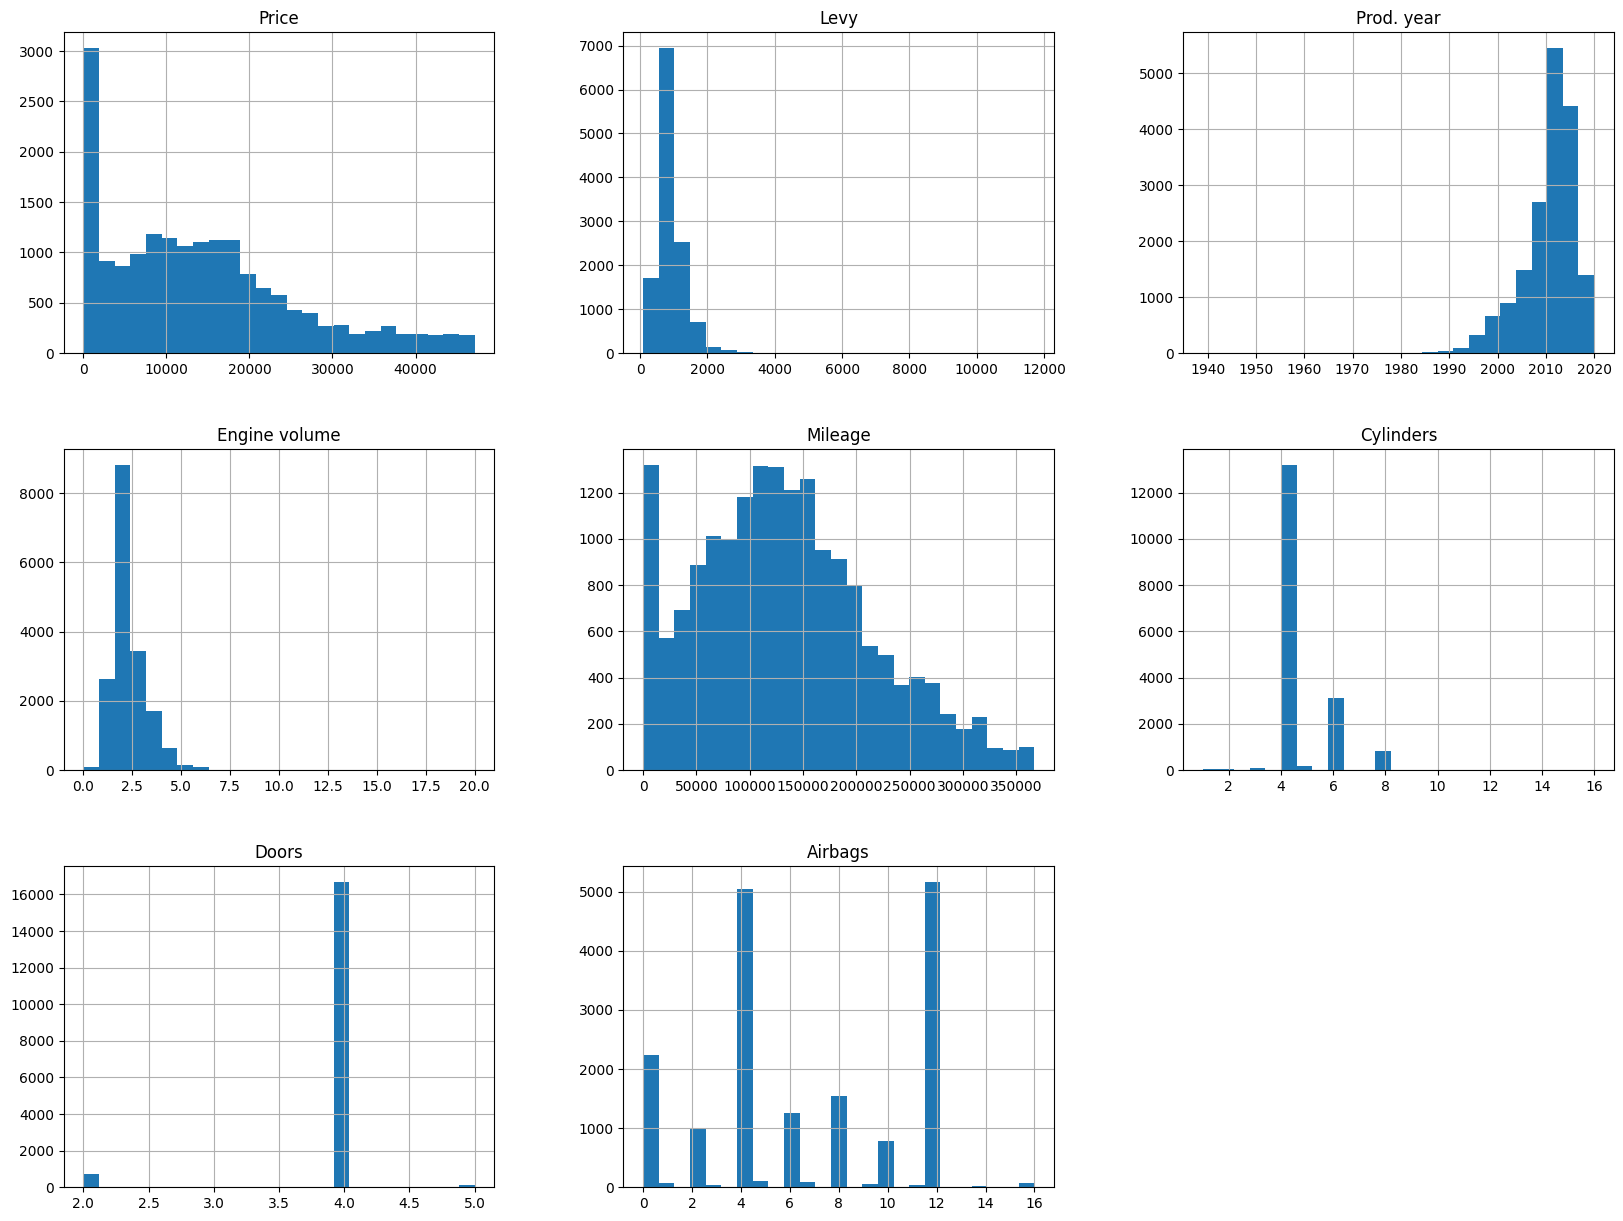

In [78]:
%matplotlib inline

deleted_df.hist(bins=25, figsize=(20,15))
plt.show()

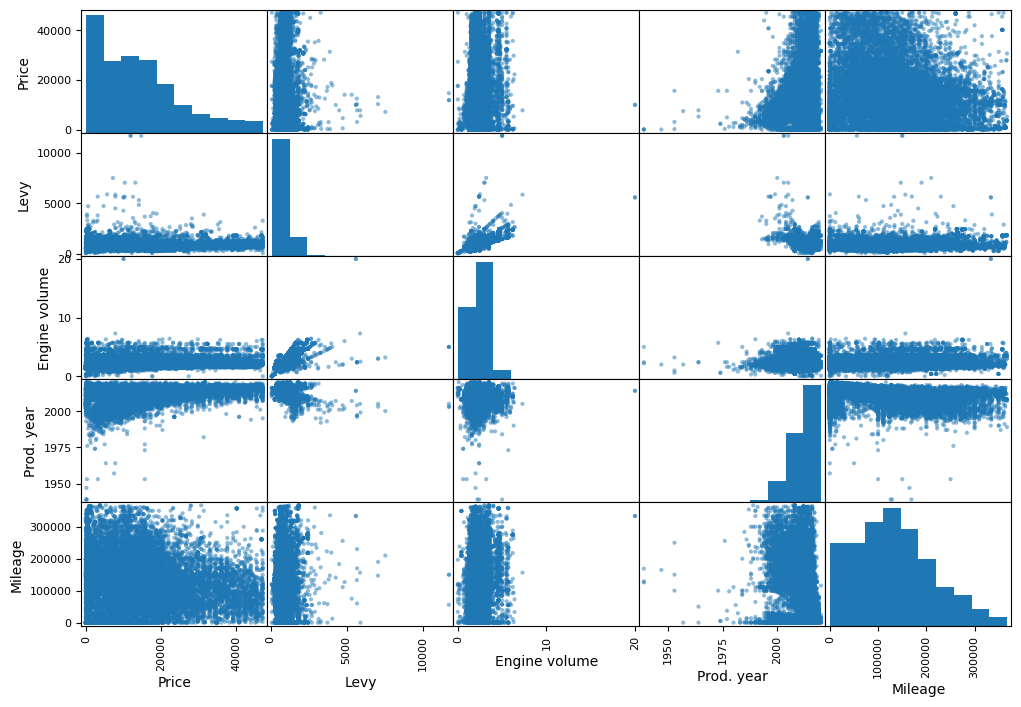

In [79]:
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(deleted_df[attributes], figsize=(12,8))
plt.show()

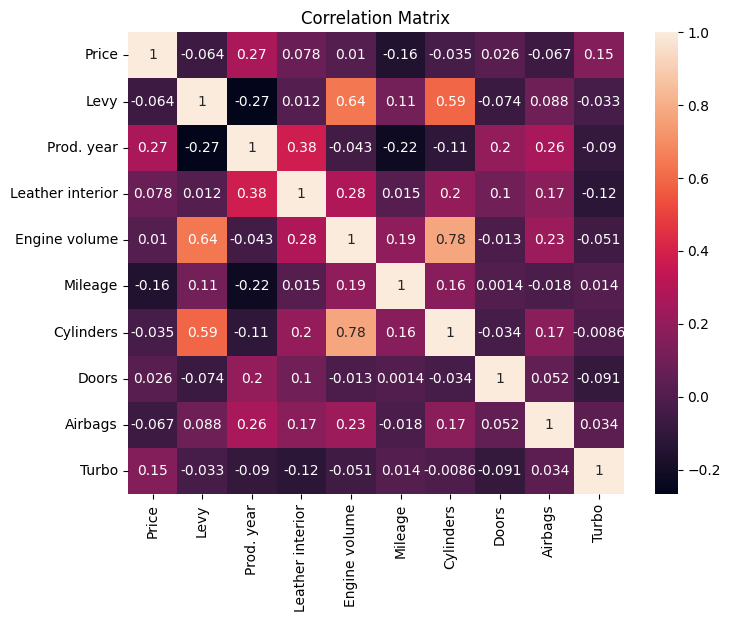

In [80]:
plt.figure(figsize=(8,6))
sns.heatmap(deleted_df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

from the matrix we can see a strong positive relationship between Cylinders and Engine volume also between levy and Engine volume.that means when ever the number of cylinders increase the engine volume increase and in the oppisite way too.

In [81]:
num_attribs = ['Levy','Prod. year', 'Engine volume','Doors', 'Mileage', 'Cylinders', 'Airbags']
cat_attribs = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

Let's split our target value from our dataset.

In [82]:
num_cars = deleted_df[num_attribs]
y = deleted_df['Price']
cat_cars = deleted_df[cat_attribs]

At very first stage we replaced '-' with NaNs which was for Levy column. we will handle them. We will impute median values for that NaNs.(We don't have any other NaN value in another column as we checked so the following code just will impute them into the Levy but if your dataset has NaN's in the multiple column the code will impute medians to each column seperately.)

In [83]:
Imputer = SimpleImputer(strategy='median')

Imputer.fit(num_cars)
# Displaying medians of every numveric column we have
display(Imputer.statistics_)
num_cars = Imputer.transform(num_cars)

array([7.79000e+02, 2.01200e+03, 2.00000e+00, 4.00000e+00, 1.26265e+05,
       4.00000e+00, 6.00000e+00])

Scaling will help to our model to make better predictions and computation time will be less.

In [84]:
scaler = StandardScaler()
num_cars = scaler.fit_transform(num_cars)

In [85]:
num_cars

array([[ 1.37160845, -0.1217927 ,  1.41203665, ...,  0.65905288,
         1.24261819,  1.24708939],
       [ 0.40211876,  0.05745498,  0.83329684, ...,  0.73275   ,
         1.24261819,  0.32314571],
       [-0.20603881, -0.8387834 , -1.13441853, ...,  0.83109479,
        -0.47689618, -1.06276982],
       ...,
       [-0.06099705, -0.1217927 , -0.32418279, ..., -0.19703846,
        -0.47689618, -0.60079798],
       [ 1.0891587 , -0.65953572, -0.32418279, ..., -0.99740519,
        -0.47689618, -0.60079798],
       [-0.27219821,  0.23670266,  0.13880906, ...,  0.67033795,
        -0.47689618,  1.24708939]])

In [86]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())])

Also we need to handle with the categorical columns because the machine learning model we will use expects only numerical values. So we will use one hot encoding, which will give 1 (Hot) the attribute is exist for that sample and 0 (Cold) for others and making full pipeline which will handle numerical values and categorical values at the same time)

In [87]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs)  
])
cars_prepared = full_pipeline.fit_transform(deleted_df)

splitting the data for train and test, we will use %66 of them for train and %33 of them for test step.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.33, random_state = 123)

# Model Setup, Tuning and Evaluation

# Linear Regression

In [89]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [90]:
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9216.571385404002

We are approximately 9.2k away from actual prices.

In [91]:
mae = mean_absolute_error(y_train, predictions)
mae

7129.709400320423

# Decision Tree

In [92]:
tree_reg = DecisionTreeRegressor(random_state = 123)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [93]:
tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

995.1400359363548

as decision trees do overfitting we shuold make a cross validation dataset

In [94]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([7454.58364456, 7298.07276603, 7704.87808287, 7407.14703388,
       7713.85297711])

the model is doing better now

In [95]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([8999.22052516, 9584.73715324, 9347.37560947, 9092.54573081,
       9528.12063963])

# Random Forest

In [96]:
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=123)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [97]:
forest_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2297.021106042258

In [98]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([5780.25626157, 5684.29515446, 5546.55824399, 5652.49716654,
       6005.14956653])

In [99]:
param_grid = [
    {'n_estimators': [100, 200], 'max_features': [35,33,31]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [35, 33, 31],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
grid_search.best_params_

{'max_features': 35, 'n_estimators': 200}

In [101]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5605.153105055072 {'max_features': 35, 'n_estimators': 100}
5589.300388047561 {'max_features': 35, 'n_estimators': 200}
5606.944440610192 {'max_features': 33, 'n_estimators': 100}
5593.997639552287 {'max_features': 33, 'n_estimators': 200}
5608.1611045576665 {'max_features': 31, 'n_estimators': 100}
5602.688100289354 {'max_features': 31, 'n_estimators': 200}


In [102]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = [i  for cat in cat_encoder.categories_ for i in cat]
attributes = num_attribs +  cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.16222821803285245, 'Prod. year'),
 (0.11406447328306066, 'Mileage'),
 (0.10666123617296097, 'Airbags'),
 (0.06947240110283213, 'Levy'),
 (0.06137691450583727, 'Engine volume'),
 (0.060392968321859065, 'Diesel'),
 (0.036292755395727495, 'Tiptronic'),
 (0.02880576099864349, 'HYUNDAI'),
 (0.02447151552525159, 'Automatic'),
 (0.023294992090805034, 'SSANGYONG'),
 (0.019544986498590513, 'Cylinders'),
 (0.019094152758166442, 'Sedan'),
 (0.017111128251968075, 'Jeep'),
 (0.015229080814674518, False),
 (0.014828442938028251, True),
 (0.014237762684945338, 'Front'),
 (0.012764262163777015, True),
 (0.012632612830036057, 'TOYOTA'),
 (0.012417781667569999, False),
 (0.010904544507763732, 'Black'),
 (0.009867545588716015, 'White'),
 (0.009764591684842349, 'Petrol'),
 (0.008982433760085267, 'Silver'),
 (0.008916379884388545, 'Hybrid'),
 (0.008767703396986662, '4x4'),
 (0.00731888123798712, 'MERCEDES-BENZ'),
 (0.007172241463251212, 'Grey'),
 (0.0065626279453928765, 'LEXUS'),
 (0.005887059508549772

In [103]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5761.036495090154

as a final result we are far with an error 5.8K from the actual value, and it seems that there are no overfitting. lets put a confidence interval.

In [104]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5506.64790839, 6004.65750968])

We are 95 percent confident to say that our errors will be in the range of (5506.64790839 , 6004.65750968).

In [105]:
# Save the model we trained
joblib.dump(final_model, "final_model.pkl")

# If you want to use this model all you need to do is:
# joblib.load('final_model.pkl')

['final_model.pkl']

We checked the feature importances couple of cell before and some of the features seem not adding quite information to our model. So let's pick first k features to train our model. In order to do that, we will make custom transformer and will use it in the Pipeline which will take care data cleaning, selection of top k features and training our model.

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [107]:
final_pipeline = Pipeline([('full',full_pipeline),
                           ('top_feature_selector',TopFeatureSelector(feature_importances, 35)),
                          ('model', final_model)])

In [108]:
final_pipeline.fit(deleted_df.drop('Price', axis=1), deleted_df['Price'])

Pipeline(steps=[('full',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Levy', 'Prod. year',
                                                   'Engine volume', 'Doors',
                                                   'Mileage', 'Cylinders',
                                                   'Airbags']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Manufacturer', 'Category',
                                                   'Leather interior',
                                                   'Fuel type', 'Gear box type',
                                                   'Drive wheels', 'Wheel',...
       6.89286962e-04, 1.09045445e-02, 4.91363900e-03, 1.22662595e-03,
       1.16353151e-03, 6.00773923e-04, 4.97234591e-04, 7.17224146e-03,
       5.55137979e-04, 3.22300378e-05, 5.26031154e-05, 1.98761021e-03,
       8.98243376e-03, 7.06118830e-04, 9.86754559e-03, 3.59591640e-04,
       1.24177817e-02, 1.27642622e-02]),
                                    k=35)),
                ('model',
                 RandomForestRegressor(max_features=35, n_estimators=200,
                                       random_state=42))])

In [109]:
some_data = deleted_df.drop('Price', axis=1).iloc[:4]
some_labels = deleted_df['Price'].iloc[:4]

pred = final_pipeline.predict(some_data)
display(pred)
display(some_labels.values)

array([13366.02646922, 16402.68      ,  8588.61      ,  3413.84898063])

array([13328, 16621,  8467,  3607])